In [81]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [82]:
#read in csv
def read_csv(path, strDate, strDateFormat):
    intSuccess = 0
    if strDateFormat != '':
#         parser = lambda date: pd.datetime.strptime(date, '%yyyy-%mm-%dd')
#         df = pd.read_csv(path,delimiter=',',parse_dates = True,
#                     infer_datetime_format = True,
#                     index_col = strDate)
        df = pd.read_csv(path, delimiter=',')
        df = df.iloc[0:35]
#         df[strDate] = df[strDate]  + strDateFormat
        df[strDate] = pd.to_datetime(datetime.strptime(df[strDate]+strDateFormat), '%y-%m-%d')
#     datetime.datetime.strptime(stDate,
#                                                    '%Y-%m-%d %H:%M:%S.%f')
        df.set_index(strDate, drop=True, inplace=True)
#         df.index = pd.to_datetime(df.index, format='%yyyy-%mm-%dd')
#         df.drop([strDate], axis=1, inplace=True)
    else:
        df = pd.read_csv(path,delimiter=',',parse_dates = True,
            infer_datetime_format = True,
            index_col = strDate
            )
        df.index = pd.to_datetime(df.index, format='%yyyy-%mm-%dd')
    if df.count != 0:
        intSuccess = 1
    return df, intSuccess

In [83]:
def show_plot_twoYs (df, colName0, colName1, colName2, fileName):
    #create two axis
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize=(30,10))
    # make a plot
    ax.plot(df.index, df[colName1], color="red", marker="o")
    # set x-axis label
    ax.set_xlabel('Date',fontsize=14)
    # set y-axis label
    ax.set_ylabel(colName1,color="red",fontsize=14)
    
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(df.index, df[colName2],color="blue",marker="o")
    ax2.set_ylabel(colName2,color="blue",fontsize=14)
    plt.show()
    # save the plot as a file
    fig.savefig(fileName + '.jpg',
                format='jpeg',
                dpi=100,
                bbox_inches='tight')
    
#     #create multiple axes
#     fig, ax = plt.subplots()
#     ax3 = ax.twinx()
#     rspine = ax3.spines['right']
#     rspine.set_position(('axes', 1.15))
#     ax3.set_frame_on(True)
#     ax3.patch.set_visible(False)
#     fig.subplots_adjust(right=0.7)

#     df.A.plot(ax=ax, style='b-')
#     # same ax as above since it's automatically added on the right
#     df.B.plot(ax=ax, style='r-', secondary_y=True)
#     df.C.plot(ax=ax3, style='g-')

#     # add legend --> take advantage of pandas providing us access
#     # to the line associated with the right part of the axis
#     ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
#                 ['A','B','C'], bbox_to_anchor=(1.5, 0.5))
    
#     #number of plots determined by number of features
#     df.plot.line(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
#     #or number of plots determined by limiting number of features to say 10
#     df[:10].plot(kind = 'hist',subplots=True, layout = (3,4) ,legend=False,title = ['Ladder','SD of Ladder','Positive affect','Negative affect','Social support','Freedom','Corruption','Generosity','Log_GDP_per_capita',
#         'Health_Life_expect'])

            Price   Open   High    Low     Vol. Change %
Date                                                    
2020-09-22  39.77  39.92  40.26  39.20        -    1.17%
2020-09-21  39.31  40.98  41.27  38.66   33.73K   -4.38%
2020-09-18  41.11  40.97  41.49  40.30   73.76K    0.34%
2020-09-17  40.97  40.19  41.22  39.42  280.67K    2.02%
2020-09-16  40.16  38.35  40.34  38.35  367.61K    4.91%


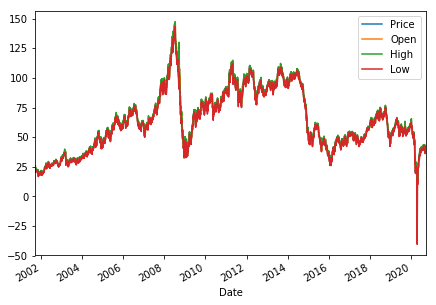

In [84]:
#read in crude price
strFile = 'crude_wti_futures_history_data.csv'
p = Path('Data')
dfCrudePrices, intSuccess = read_csv(Path(p,strFile), 'Date', '')
if intSuccess == 1:
    print(dfCrudePrices.head())
    dfCrudePrices.plot(figsize=(7,5))
else:
    print('Tough luck sucker')

            USALORSGPNOSTSAM
DATE                        
1960-01-01        100.991749
1960-02-01        101.002084
1960-03-01        100.925914
1960-04-01        100.765569
1960-05-01        100.540045


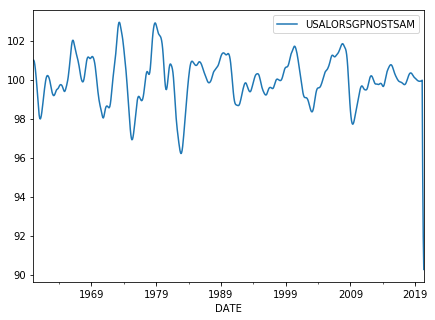

In [85]:
#read in GDP compare data
strFile = 'US_GDP_Monthly.csv'
p = Path('Data')
dfJoining, intSuccess = read_csv(Path(p,strFile), 'DATE', '')
if intSuccess == 1:
    print(dfJoining.head())
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

In [86]:
#inner join the tables to the crude price table setting Date as index if Date column exists; if not, spit error
print(dfCrudePrices.head())
print(dfJoining.head())

            Price   Open   High    Low     Vol. Change %
Date                                                    
2020-09-22  39.77  39.92  40.26  39.20        -    1.17%
2020-09-21  39.31  40.98  41.27  38.66   33.73K   -4.38%
2020-09-18  41.11  40.97  41.49  40.30   73.76K    0.34%
2020-09-17  40.97  40.19  41.22  39.42  280.67K    2.02%
2020-09-16  40.16  38.35  40.34  38.35  367.61K    4.91%
            USALORSGPNOSTSAM
DATE                        
1960-01-01        100.991749
1960-02-01        101.002084
1960-03-01        100.925914
1960-04-01        100.765569
1960-05-01        100.540045


In [87]:
#inner join on index
joined_GDP_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_GDP_df.head() 

,Price,Open,High,Low,Vol.,Change %,USALORSGPNOSTSAM
2020-05-01,19.78,19.04,20.48,18.07,403.20K,4.99%,90.264283
2020-04-01,20.31,20.10,21.55,19.90,703.29K,-0.83%,91.904561
2020-01-01,61.33,61.52,61.54,61.33,-,0.44%,99.951155
2019-11-01,56.20,54.15,56.33,54.07,538.12K,3.73%,99.923862
2019-10-01,53.62,54.28,54.84,53.05,589.18K,-0.83%,99.918159


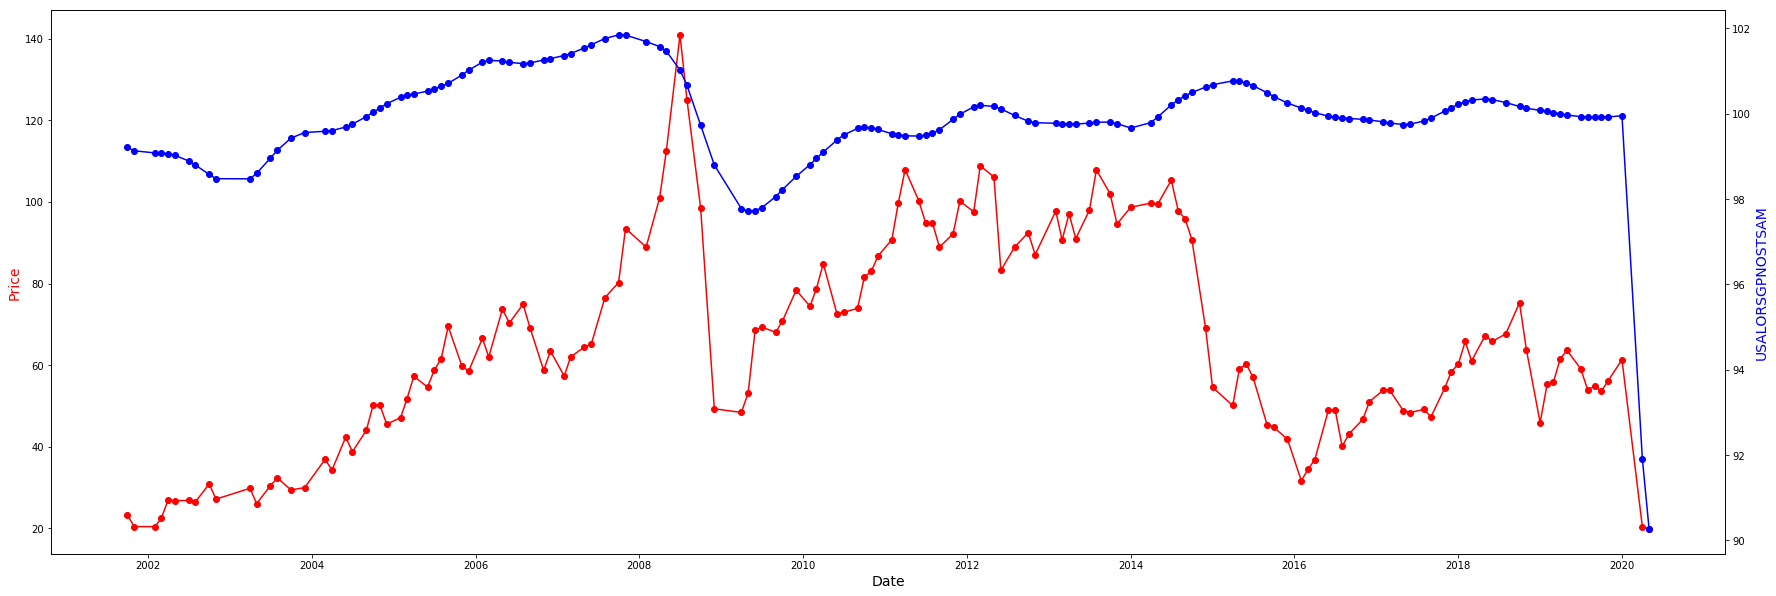

In [88]:
#check table shape
joined_GDP_df.info
#plot the data
show_plot_twoYs (joined_GDP_df, joined_GDP_df.index, 'Price', 'USALORSGPNOSTSAM', 'GDP')

            value
date             
1983-01-01   8634
1983-02-01   8660
1983-03-01   8677
1983-04-01   8686
1983-05-01   8682


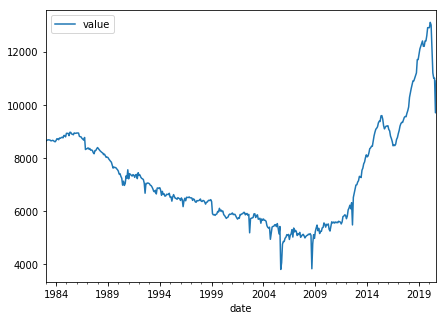

In [89]:
#read in US Oil Production compare data
strFile = 'us-crude-oil-production-historical-chart.csv'
p = Path('Data')
dfJoining, intSuccess = read_csv(Path(p,strFile), 'date', '')
if intSuccess == 1:
    print(dfJoining.head())
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

In [90]:
#inner join on index
joined_Oil_Production_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_Oil_Production_df.head(300) 

,Price,Open,High,Low,Vol.,Change %,value
2020-09-01,42.76,42.83,43.43,42.72,285.15K,0.35%,10900
2020-07-01,39.82,39.84,40.58,39.05,407.17K,1.40%,11000
2020-06-01,35.44,35.21,35.90,34.27,385.71K,-0.14%,11000
2020-05-01,19.78,19.04,20.48,18.07,403.20K,4.99%,11200
2020-04-01,20.31,20.10,21.55,19.90,703.29K,-0.83%,12100
2020-01-01,61.33,61.52,61.54,61.33,-,0.44%,12900
2019-11-01,56.20,54.15,56.33,54.07,538.12K,3.73%,12900
2019-10-01,53.62,54.28,54.84,53.05,589.18K,-0.83%,12600
2019-09-01,54.80,55.00,55.00,54.56,-,-0.54%,12400
2019-08-01,53.95,57.85,57.99,53.59,886.75K,-7.90%,12400


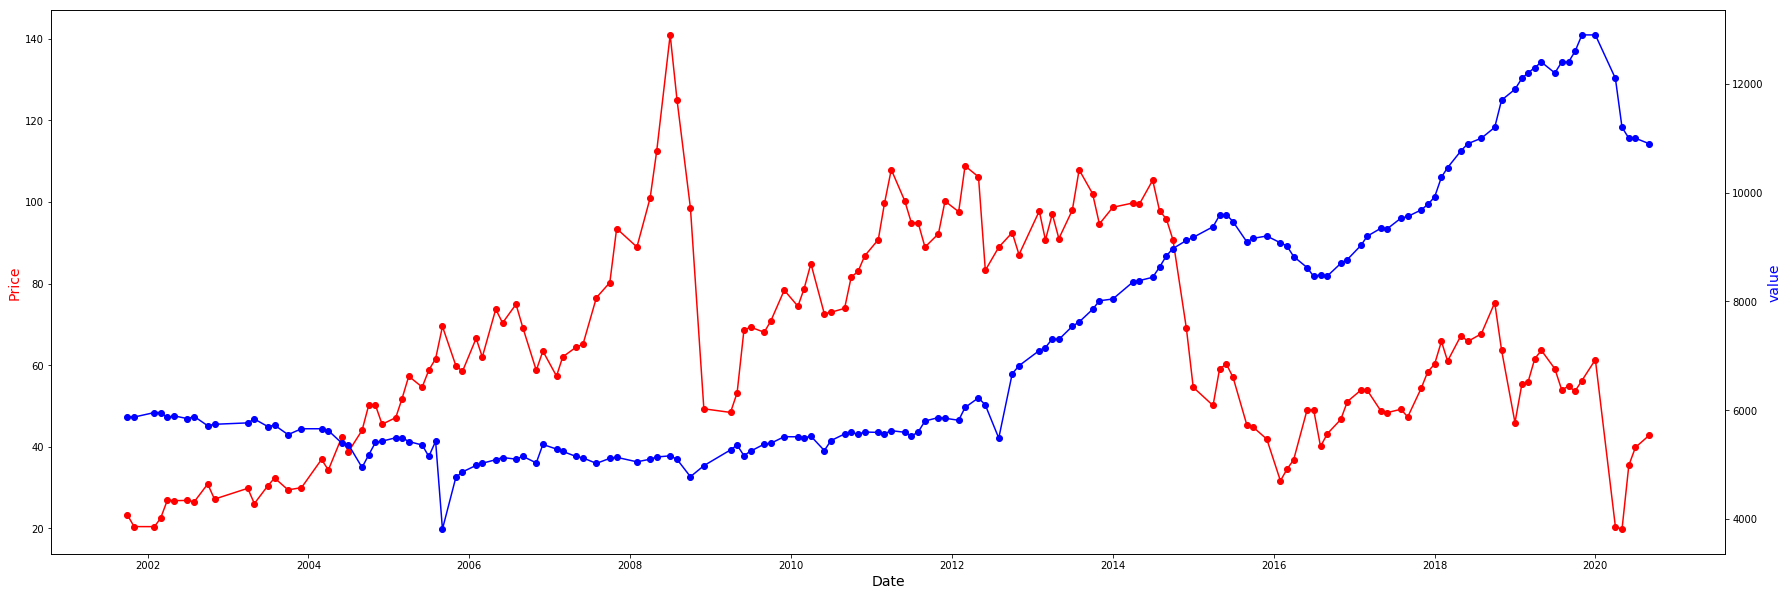

In [91]:
#check table shape
joined_Oil_Production_df.info
#plot the data
show_plot_twoYs (joined_Oil_Production_df, joined_Oil_Production_df.index, 'Price', 'value', 'OilProduction')

            value
date             
1959-01-01   1657
1959-02-01   1667
1959-03-01   1620
1959-04-01   1590
1959-05-01   1498


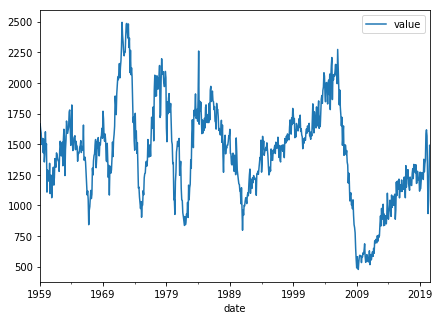

In [92]:
#read in US Housing Starts compare data
strFile = 'housing-starts-historical-chart.csv'
p = Path('Data')
dfJoining, intSuccess = read_csv(Path(p,strFile), 'date', '')
if intSuccess == 1:
    print(dfJoining.head())
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

In [93]:
#inner join on index
joined_Housing_Starts_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_Housing_Starts_df.head() 

,Price,Open,High,Low,Vol.,Change %,value
2020-07-01,39.82,39.84,40.58,39.05,407.17K,1.40%,1492
2020-06-01,35.44,35.21,35.90,34.27,385.71K,-0.14%,1265
2020-05-01,19.78,19.04,20.48,18.07,403.20K,4.99%,1038
2020-04-01,20.31,20.10,21.55,19.90,703.29K,-0.83%,934
2020-01-01,61.33,61.52,61.54,61.33,-,0.44%,1617


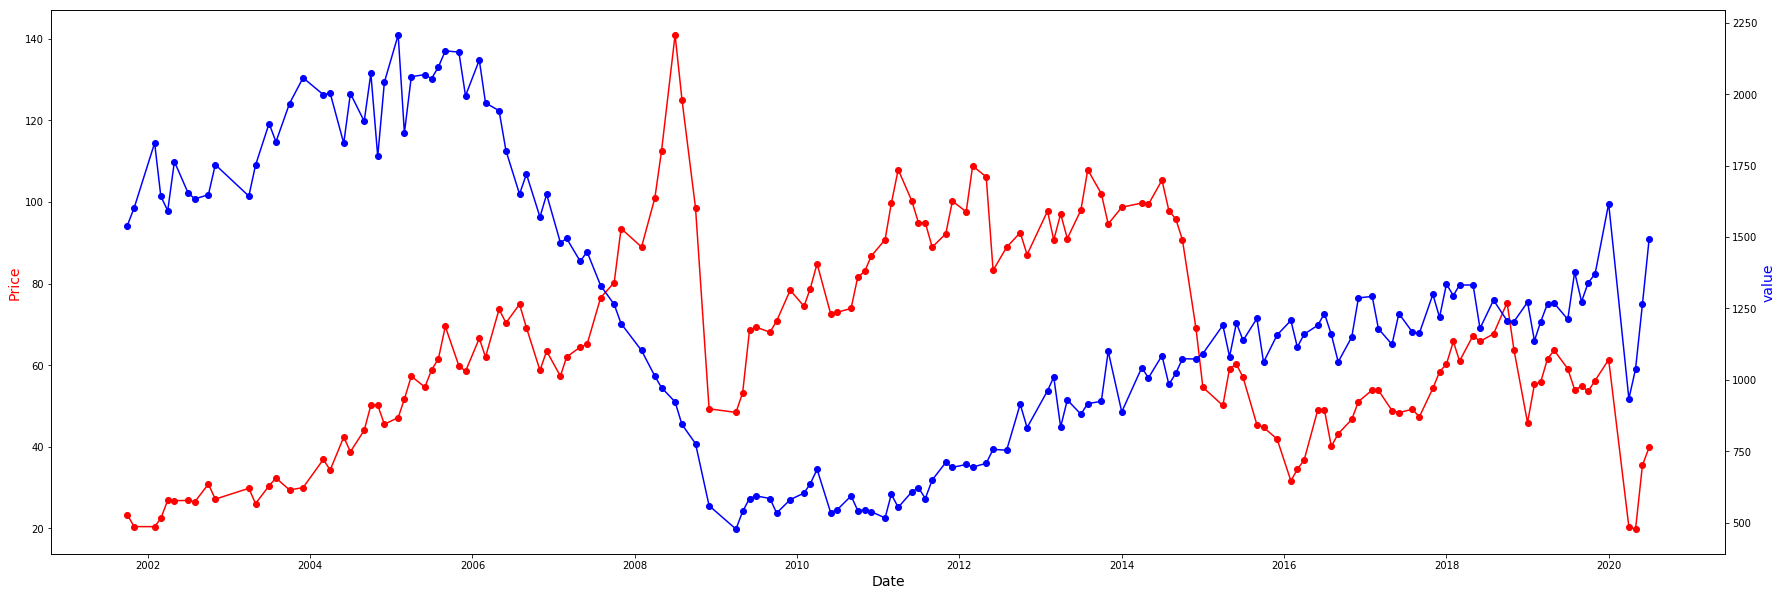

In [94]:
#check table shape
joined_Housing_Starts_df.info
#plot the data
show_plot_twoYs (joined_Housing_Starts_df, joined_Housing_Starts_df.index, 'Price', 'value', 'HousingStarts')

In [95]:
#bring in oil consumption compare data
#read in GDP compare data
strFile = 'OilConsumption.csv'
p = Path('Data')
dfJoining, intSuccess = read_csv(Path(p,strFile), 'Date', '-01-01')

if intSuccess == 1:
    print(dfJoining.head())
    dfJoining['World petroleum consumption']=pd.to_numeric(dfJoining['World petroleum consumption'],errors='coerce')
    dfJoining['U.S. petroleum consumption']=pd.to_numeric(dfJoining['U.S. petroleum consumption'],errors='coerce')
    dfJoining.plot(figsize=(7,5))
else:
    print('Tough luck sucka')

TypeError: strptime() takes exactly 2 arguments (1 given)

In [ ]:
#inner join on index
joined_OilConsumption_df= pd.merge(dfCrudePrices, dfJoining, left_index=True, right_index=True, how='inner')
joined_OilConsumption_df.head(30) 